# **imports**

In [ ]:
import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from os import listdir
import tensorflow as tf


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Loading data**

In [ ]:
x_test=[]
i=0
for images in os.listdir('/content/drive/MyDrive/test'):
    img = cv2.cvtColor(cv2.imread(("/content/drive/MyDrive/test//" +images)), cv2.COLOR_BGR2RGB)

    if(type(img) == type(None) or len(img.shape) !=3 or img.shape[2]!=3):
      pass
    else:
      resized = cv2.resize(img, (256,256), interpolation = cv2.INTER_AREA)
      normalize=(np.asarray(resized).astype('float32')) / 255
      x_test.append(normalize)

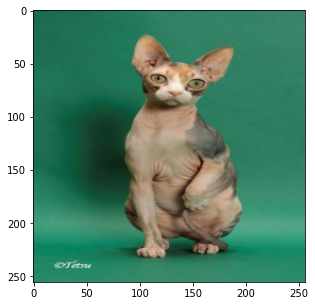

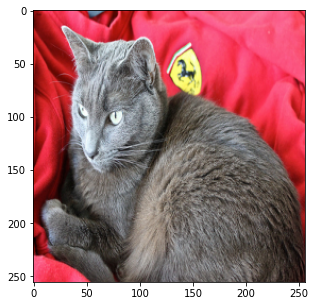

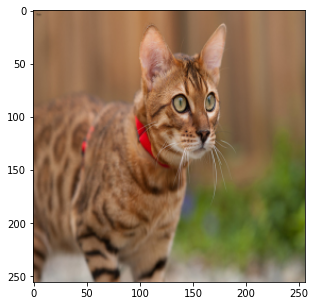

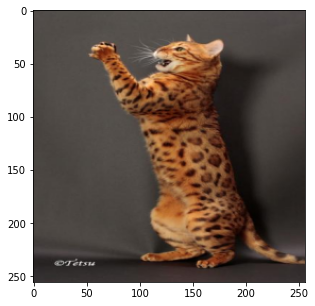

In [ ]:
X=[]
for i in range(len(x_test))  :
  image_sum = x_test[i].sum(axis=2)
  X.append( image_sum/image_sum.max())
  plt.figure(figsize=[8,5])
  plt.imshow(X, cmap=plt.cm.gray)

In [ ]:
X = np.array(X)
X.shape

(4, 256, 256)

In [ ]:
X_meaned=[]
for i in range(len(X)):
  X_meaned.append( X[i] - np.mean(X[i] , axis = 0))
X_meaned=np.array(X_meaned)
print (X_meaned.shape)


(4, 256, 256)


In [ ]:
cov_mat=[]
for i in range (len(X_meaned)):
  cov_mat.append( np.cov(X_meaned[i] , rowvar = False))   # rowvar = False >> work with X_meaned as transposed

cov_mat = np.array(cov_mat)
print (cov_mat.shape)
print (cov_mat)

(4, 256, 256)
[[[ 0.00250732  0.00245423  0.00241903 ...  0.00147073  0.00148264
    0.00148329]
  [ 0.00245423  0.00242502  0.00239704 ...  0.00146833  0.00148232
    0.00148408]
  [ 0.00241903  0.00239704  0.00238426 ...  0.00146017  0.00147501
    0.00147744]
  ...
  [ 0.00147073  0.00146833  0.00146017 ...  0.00141434  0.00141783
    0.00141609]
  [ 0.00148264  0.00148232  0.00147501 ...  0.00141783  0.00143061
    0.0014336 ]
  [ 0.00148329  0.00148408  0.00147744 ...  0.00141609  0.0014336
    0.00144763]]

 [[ 0.0180926   0.01736594  0.01586715 ... -0.00350644 -0.00268437
   -0.00247403]
  [ 0.01736594  0.01983416  0.01886851 ... -0.00561352 -0.00472999
   -0.00470472]
  [ 0.01586715  0.01886851  0.02111718 ... -0.00775143 -0.00705175
   -0.00682673]
  ...
  [-0.00350644 -0.00561352 -0.00775143 ...  0.0293667   0.02729383
    0.0276165 ]
  [-0.00268437 -0.00472999 -0.00705175 ...  0.02729383  0.02732101
    0.0275606 ]
  [-0.00247403 -0.00470472 -0.00682673 ...  0.0276165   0.02

In [ ]:
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
print (eigen_vectors.shape)
print (eigen_values)

(4, 256, 256)
[[2.26943015e-18 4.74326957e-10 1.13846272e-09 ... 3.22577059e-01
  4.93161665e-01 9.76860166e-01]
 [1.50366926e-17 1.38354893e-09 3.14980520e-08 ... 6.99377902e-01
  1.00014969e+00 2.52813782e+00]
 [1.14571782e-17 5.43598936e-11 8.53049598e-10 ... 3.32103106e-01
  5.76405304e-01 1.38467281e+00]
 [2.00765173e-18 6.42848235e-10 9.87869888e-10 ... 3.29090903e-01
  3.66370714e-01 8.47784295e-01]]


In [ ]:
#sort the eigenvalues in descending order
sorted_eigenvectors=[]
sorted_index = np.argsort(-eigen_values)
print (sorted_index)
print(sorted_index.shape)
for i in range(len(eigen_values)):
  sorted_eigenvalue = eigen_values[i][sorted_index[i]]
#similarly sort the eigenvectors
  sorted_eigenvectors.append(eigen_vectors[i][:,sorted_index[i]])

[[255 254 253 ...   2   1   0]
 [255 254 253 ...   2   1   0]
 [255 254 253 ...   2   1   0]
 [255 254 253 ...   2   1   0]]
(4, 256)


In [ ]:
sorted_eigenvectors=np.array(sorted_eigenvectors)
sorted_eigenvectors.shape

(4, 256, 256)

 # **8 components**

In [ ]:
#n_components = 2 #you can select any number of components.
eigenvector_subset= []
for i in range(len(eigen_values)):
  eigenvector_subset.append(sorted_eigenvectors[i][:,0:8])
eigenvector_subset = np.array(eigenvector_subset)
print (eigenvector_subset.shape)

(4, 256, 8)


In [ ]:
X_reduced=[]
for i in range(len(eigen_values)):
  X_reduced.append(np.dot(eigenvector_subset[i].transpose(),X_meaned[i].transpose()).transpose())
X_reduced = np.array(X_reduced)
print(X_reduced.shape)

(4, 256, 8)


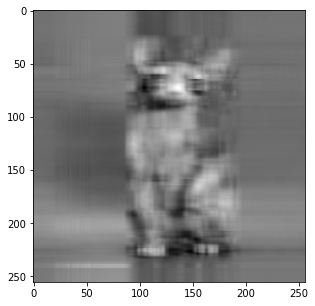

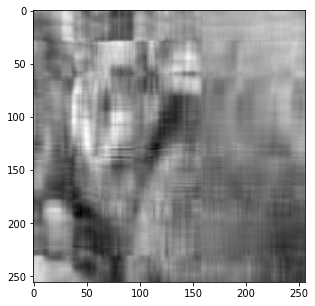

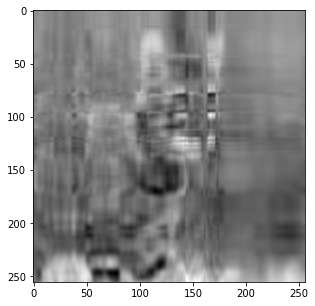

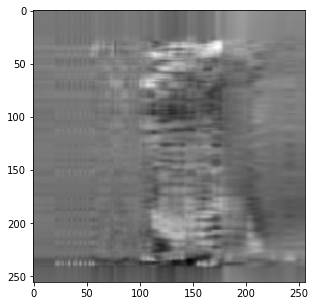

In [ ]:
for i in range(len(eigen_values)):
  comp=np.dot(X_reduced[i], eigenvector_subset[i].T) #returns the matrix product of two arrays.
  plt.figure(figsize=[8,5])
  plt.imshow(comp.reshape(256,256),cmap='gray')

 # **16 components**

In [ ]:
#n_components = 2 #you can select any number of components.
eigenvector_subset= []
for i in range(len(eigen_values)):
  eigenvector_subset.append(sorted_eigenvectors[i][:,0:16])
eigenvector_subset = np.array(eigenvector_subset)
print (eigenvector_subset.shape)

(4, 256, 16)


In [ ]:
X_reduced=[]
for i in range(len(eigen_values)):
  X_reduced.append(np.dot(eigenvector_subset[i].transpose(),X_meaned[i].transpose()).transpose())
X_reduced = np.array(X_reduced)
print(X_reduced.shape)

(4, 256, 16)


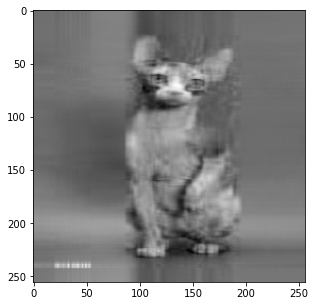

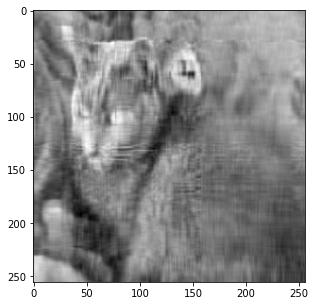

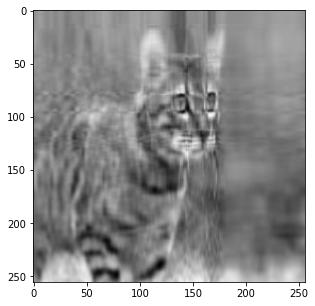

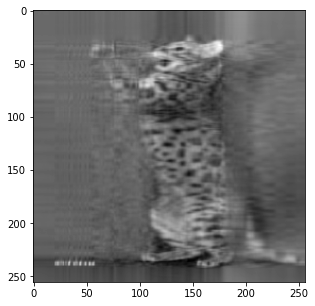

In [ ]:
for i in range(len(eigen_values)):
  comp=np.dot(X_reduced[i], eigenvector_subset[i].T) #returns the matrix product of two arrays.
  plt.figure(figsize=[8,5])
  plt.imshow(comp.reshape(256,256),cmap='gray')

 # **32 components**

In [ ]:
#n_components = 2 #you can select any number of components.
eigenvector_subset= []
for i in range(len(eigen_values)):
  eigenvector_subset.append(sorted_eigenvectors[i][:,0:32])
eigenvector_subset = np.array(eigenvector_subset)
print (eigenvector_subset.shape)

(4, 256, 32)


In [ ]:
X_reduced=[]
for i in range(len(eigen_values)):
  X_reduced.append(np.dot(eigenvector_subset[i].transpose(),X_meaned[i].transpose()).transpose())
X_reduced = np.array(X_reduced)
print(X_reduced.shape)

(4, 256, 32)


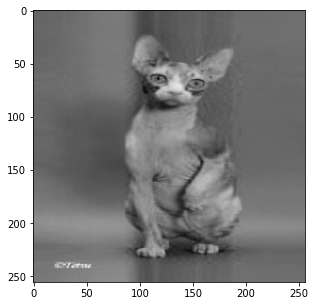

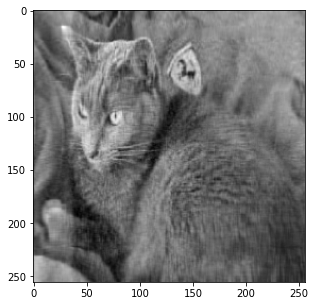

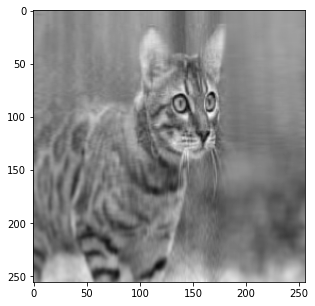

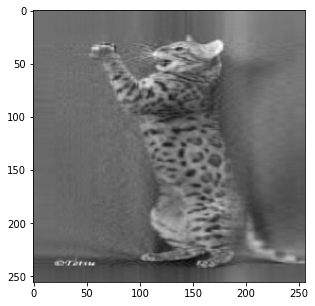

In [ ]:
for i in range(len(eigen_values)):
  comp=np.dot(X_reduced[i], eigenvector_subset[i].T) #returns the matrix product of two arrays.
  plt.figure(figsize=[8,5])
  plt.imshow(comp.reshape(256,256),cmap='gray')

 # **64 components**

In [ ]:
#n_components = 2 #you can select any number of components.
eigenvector_subset= []
for i in range(len(eigen_values)):
  eigenvector_subset.append(sorted_eigenvectors[i][:,0:128])
eigenvector_subset = np.array(eigenvector_subset)
print (eigenvector_subset.shape)

(4, 256, 128)


In [ ]:
X_reduced=[]
for i in range(len(eigen_values)):
  X_reduced.append(np.dot(eigenvector_subset[i].transpose(),X_meaned[i].transpose()).transpose())
X_reduced = np.array(X_reduced)
print(X_reduced.shape)

(4, 256, 128)


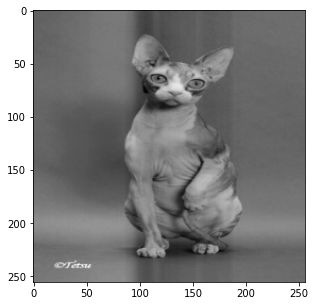

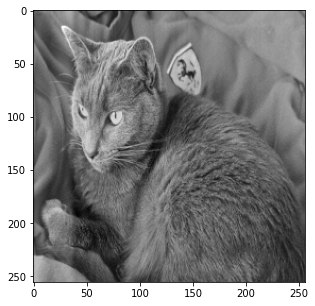

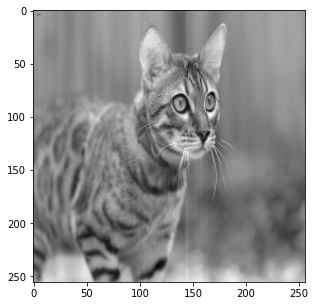

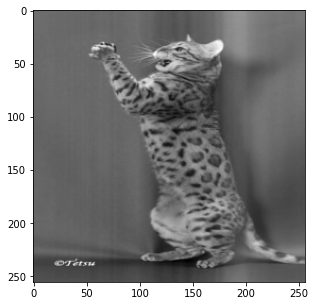

In [ ]:
for i in range(len(eigen_values)):
  comp=np.dot(X_reduced[i], eigenvector_subset[i].T) #returns the matrix product of two arrays.
  plt.figure(figsize=[8,5])
  plt.imshow(comp.reshape(256,256),cmap='gray')